<a href="https://colab.research.google.com/github/ivancleycarneiro/Python/blob/main/Projeto_An%C3%A1lise_A%C3%A7%C3%B5es_Magalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Mercado Financeiro


Os dados utilizados nesse trabalho estão disponíveis no link abaixo.

[Dados para análise](https://docs.google.com/spreadsheets/d/1r0_Vs5QX1ef5X1MZCbDg8kcqm-my3rSn/edit?usp=sharing&ouid=108903987275959757465&rtpof=true&sd=true://)

In [3]:
# vamos baixar as bibliotecas necessárias

#Bibliotecas para Modelagem e Matrizes
import numpy as np
import pandas as pd

#Bicliotecas para análises gráficas
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

#Bilibliotecas para ignorar avisos
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Lendo os dados
Base_Dados = pd.read_excel('/content/Vase_004 - Magalu - Sem Resolução.xlsx')

#verificando dados
Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [11]:
Base_Dados.shape

(247, 7)

In [12]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [14]:
Base_Dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [5]:
#Verificando dados unicos
Base_Dados.nunique()

Data          247
Maior         217
Menor         229
Abertura      225
Fechamento    227
Volume        247
Adj Close     236
dtype: int64

In [7]:
#Vericando campos nulos

Base_Dados.isnull().sum()

Data          0
Maior         0
Menor         0
Abertura      0
Fechamento    0
Volume        0
Adj Close     0
dtype: int64

In [16]:
# Aqui vamos mudar a coluna 'Data' para o lugar da coluna 'Index'

Dados = Base_Dados.set_index('Data')
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


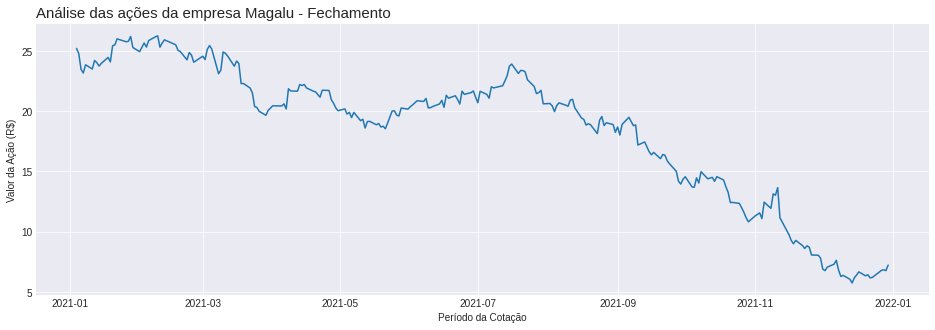

In [25]:
# Series Temporais
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16, 5))
plt.title('Análise das ações da empresa Magalu - Fechamento', fontsize=15, loc='left')
plt.plot(Dados.index, Dados['Fechamento']);

plt.xlabel('Período da Cotação')
plt.ylabel('Valor da Ação (R$)');

In [27]:
# Para apresentar os últimos valores da tabela utilzamos o .tail().
Dados.tail()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


In [34]:
# Vamos apresentar a média móvel do período com a função .rolling()

Dados['Fechamento'].rolling(30).mean()

Data
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2021-12-23    7.737667
2021-12-27    7.508667
2021-12-28    7.364667
2021-12-29    7.265333
2021-12-30    7.197000
Name: Fechamento, Length: 247, dtype: float64

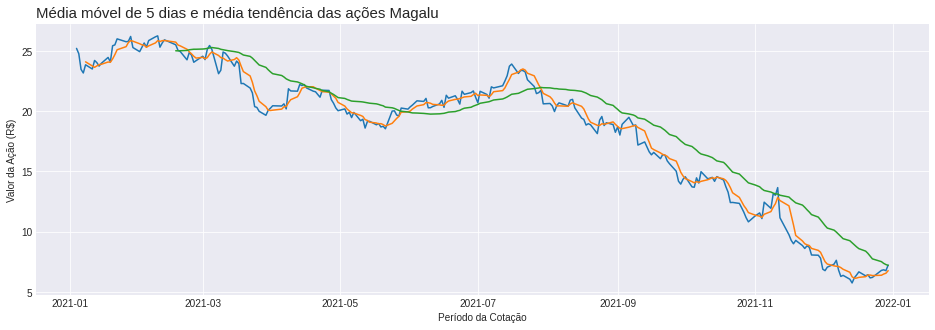

In [45]:
from IPython.core.pylabtools import figsize
# média móvel de 5 dias e média tendêndia

Media_movel = Dados['Fechamento'].rolling(5).mean()
Media_Tendencia = Dados['Fechamento'].rolling(30).mean()


# Agora vamos definir o gráfico para exibição
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Média móvel de 5 dias e média tendência das ações Magalu', fontsize=15, loc='left')

plt.plot(Dados.index, Dados['Fechamento'])
plt.plot(Dados.index, Media_movel)
plt.plot(Dados.index, Media_Tendencia)

plt.xlabel('Período da Cotação')
plt.ylabel('Valor da Ação (R$)');

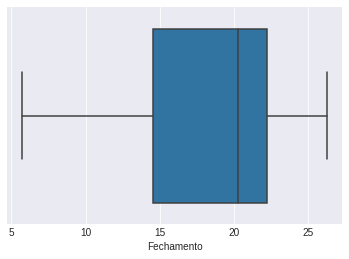

In [48]:
# boxplot diario não faz muito sentido para esse caso, mas vou fazer apenas para ilustrar

sns.boxplot(data=Dados, x='Fechamento');

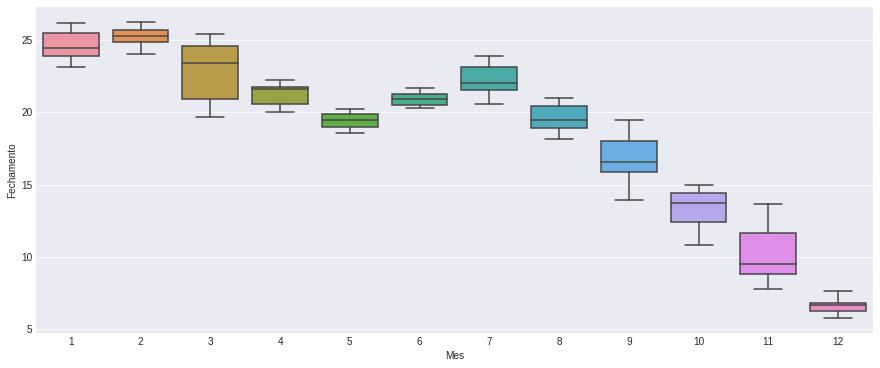

In [50]:
# Boxplot mensal

Base_Dados['Mes'] = Base_Dados['Data'].dt.month

plt.figure(figsize=(15,6))
sns.boxplot(data=Base_Dados, x= 'Mes', y='Fechamento');

In [51]:
# Vamos ver os dados agrupado para uma visão mais analítica
Base_Dados.groupby(['Mes',]).describe()['Fechamento']

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000


In [62]:
# Grafico para bovespa

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= Dados.index,
              open = Dados['Abertura'],
              high = Dados['Maior'],
              low = Dados['Menor'],
              close = Dados['Fechamento'],
          )
    ]
  )

Grafico.show()